## Stock Forecasting
Time Series is a collection of data points collected at constant time intervals. It is time dependent. Along with an increasing or decreasing trend, most TS have some form of seasonality trends, i.e. variations specific to a particular time frame. For example, if you see the sales of a woolen jacket over time, you will invariably find higher sales in winter seasons.

In [3]:
# importing necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

### Loading and Handling Time Series in Pandas

In [4]:
# load the data
apple = pd.read_csv("AAPL.csv")
apple.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1996-01-02,1.151786,1.151786,1.133929,1.147321,0.993233,34823600
1,1996-01-03,1.142857,1.174107,1.138393,1.147321,0.993233,107458400
2,1996-01-04,1.156250,1.156250,1.120536,1.127232,0.975842,75045600
3,1996-01-05,1.129464,1.223214,1.120536,1.223214,1.058933,111482000
4,1996-01-08,1.232143,1.267857,1.214286,1.236607,1.070527,30335200


In [5]:
# identify the data types
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6193 entries, 0 to 6192
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6193 non-null   object 
 1   Open       6193 non-null   float64
 2   High       6193 non-null   float64
 3   Low        6193 non-null   float64
 4   Close      6193 non-null   float64
 5   Adj Close  6193 non-null   float64
 6   Volume     6193 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 338.8+ KB


In [6]:
# decribed data
apple.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6193.000000,6193.000000,6193.000000,6193.000000,6193.000000,6.193000e+03
mean,56.237443,56.820016,55.671111,56.272008,52.994036,1.096375e+08
std,74.910837,75.740761,74.210479,75.039504,73.670390,9.725212e+07
min,0.459821,0.473214,0.455357,0.462054,0.399999,9.835000e+06
25%,1.633929,1.665179,1.600714,1.634286,1.414797,4.438730e+07
50%,18.492857,18.900000,18.090000,18.485714,16.003035,8.156190e+07
75%,94.040001,94.820000,93.040001,94.019997,84.512062,1.429260e+08
max,441.619995,457.649994,439.190002,455.609985,455.609985,1.855410e+09


In [7]:
# identifying the shape of the data
apple.shape

(6193, 7)

### Time Series Data Structure
3 types of structures are used with TS data: 
- DatetimeIndex (mostly used) 
- PeriodIndex 
- TimedeltaIndex 

Why do we need to convert the time into datetime while working with TS data? 
Time series data can come in with so many different formats. But not all of those formats are friendly to python’s pandas’ library. The most convenient format is the timestamp format for Pandas. But most of the time time-series data come in string formats. That is the reason why we need to change the date type from object to timestamp.
We will make it to the DatetimeIndex format and put it as the index column. Because when the ‘date’ column is the index column we will be able to resample it very easily.

In [8]:
# convert the data from object to datetime, to prevent future problems in plotting on a histogram
apple = pd.read_csv("AAPL.csv", parse_dates=['Date'], index_col="Date")
apple.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-31,411.540009,425.660004,403.299988,425.040009,425.040009,93584200
2020-08-03,432.799988,446.549988,431.570007,435.750000,435.750000,77037800
2020-08-04,436.529999,443.160004,433.549988,438.660004,438.660004,43267900
2020-08-05,437.510010,441.570007,435.589996,440.250000,440.250000,30498000
2020-08-06,441.619995,457.649994,439.190002,455.609985,455.609985,50490000


##### Why is resampling important?
Because we do not always need all the data in a huge dataset. For example, we may need only the data from June 2019. If your date format is in DatetimeIndex, it is very easy:

In [9]:
# selecting data for a specific year
apple['2019']

/Users/elonazharri/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,154.889999,158.850006,154.229996,157.919998,154.794983,37039700
2019-01-03,143.979996,145.720001,142.000000,142.190002,139.376251,91312200
2019-01-04,144.529999,148.550003,143.800003,148.259995,145.326126,58607100
2019-01-07,148.699997,148.830002,145.899994,147.929993,145.002686,54777800
2019-01-08,149.559998,151.820007,148.520004,150.750000,147.766861,41025300
...,...,...,...,...,...,...
2019-12-24,284.690002,284.890015,282.920013,284.269989,282.831299,12119700
2019-12-26,284.820007,289.980011,284.700012,289.910004,288.442780,23280300
2019-12-27,291.119995,293.970001,288.119995,289.799988,288.333313,36566500


In [10]:
# Or we can get the data for a single day
apple.loc['2019-12-30']

Open         2.894600e+02
High         2.926900e+02
Low          2.852200e+02
Close        2.915200e+02
Adj Close    2.900446e+02
Volume       3.602860e+07
Name: 2019-12-30 00:00:00, dtype: float64

In [11]:
# Check if there is any missing data
apple.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [12]:
# dropping Close column, as we will use the Adjusted Close column for our model
apple = apple.drop('Close', axis=1)
apple = apple.rename(columns={"Adj Close": "Close"})
apple

,Open,High,Low,Close,Volume
Date,,,,,
1996-01-02,1.151786,1.151786,1.133929,0.993233,34823600
1996-01-03,1.142857,1.174107,1.138393,0.993233,107458400
1996-01-04,1.156250,1.156250,1.120536,0.975842,75045600
1996-01-05,1.129464,1.223214,1.120536,1.058933,111482000
1996-01-08,1.232143,1.267857,1.214286,1.070527,30335200
...,...,...,...,...,...
2020-07-31,411.540009,425.660004,403.299988,425.040009,93584200
2020-08-03,432.799988,446.549988,431.570007,435.750000,77037800
2020-08-04,436.529999,443.160004,433.549988,438.660004,43267900


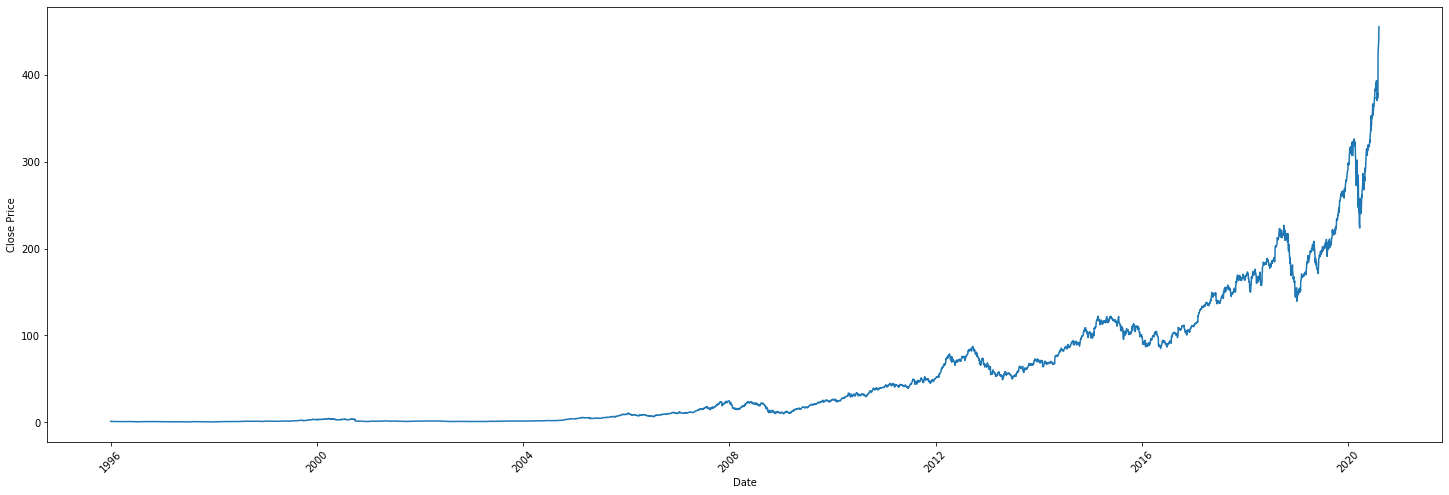

In [13]:
# visualize the data to gain some insight
plt.figure(figsize=(25,8))
plt.plot(apple.index,'Close', data=apple)
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.show()

In [14]:
# Call the .corr() method on the apple dataset 
apple.corr()

,Open,High,Low,Close,Volume
Open,1.000000,0.999920,0.999916,0.998900,-0.359337
High,0.999920,1.000000,0.999868,0.999056,-0.357955
Low,0.999916,0.999868,1.000000,0.998961,-0.361110
Close,0.998900,0.999056,0.998961,1.000000,-0.360740
Volume,-0.359337,-0.357955,-0.361110,-0.360740,1.000000


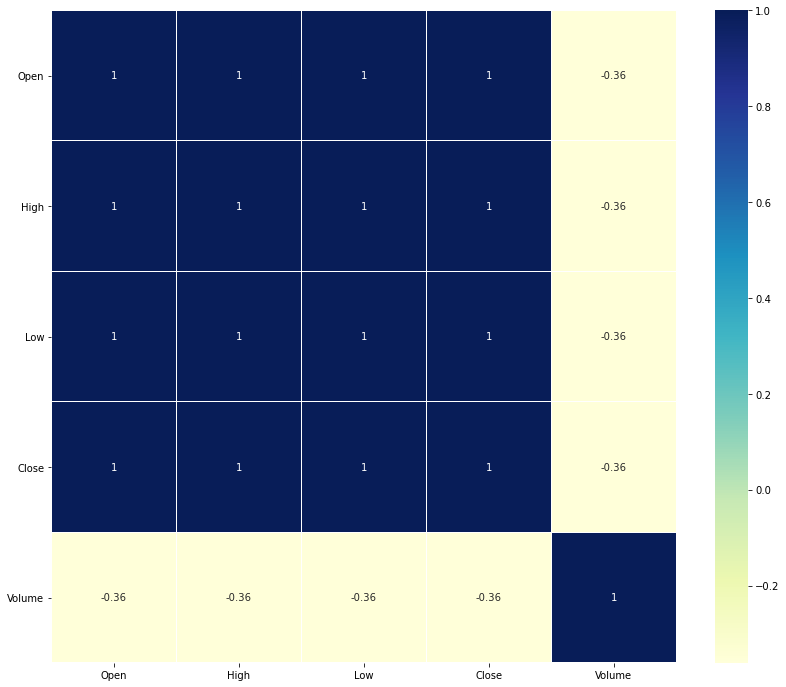

In [15]:
#create the correlation matrix heat map
plt.figure(figsize=(14,12))
sns.heatmap(apple.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

# EDA

### How to Check Stationarity of our TS data?
We can check stationarity using the following:
Plotting Rolling Statistics: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months.
Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the TS is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

### Plotting Rolling Statistics

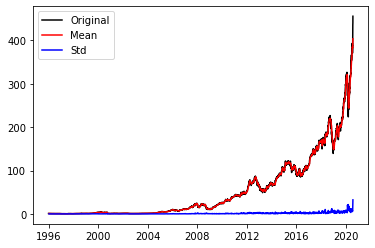

In [17]:
# plot mean and std
rolmean = apple['Close'].rolling(window=12).mean()
rolstd = apple['Close'].rolling(window=12).std()
orig = plt.plot(apple['Close'], color='black', label='Original')
mean = plt.plot(rolmean, color='red', label='Mean')
std = plt.plot(rolstd, color='blue', label='Std')
plt.legend(loc='best')
plt.title = ("Rolling mean and STD")
plt.show(block=False)

### Dickey-Fuller Test

Null hypothesis in ADF test is that Data is not stationary.
- if Test Statistic < Critical Values => Rejects the null hypothesis.
- if Test Statistic >Critical Values => failed to reject the null hypothesis.

In [18]:
# checking the stationarity of the data by using adfuller test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
test_stationarity(apple['Close'])

Results of Dickey-Fuller Test:
Test Statistic                    5.150154
p-value                           1.000000
#Lags Used                       34.000000
Number of Observations Used    6158.000000
Critical Value (1%)              -3.431412
Critical Value (5%)              -2.862009
Critical Value (10%)             -2.567020
dtype: float64


From the results of Dickey-Fuller Test, the p-value is not less than 5%, so we can not reject the null hypothesis that the series is a random walk. As we know that a random walk is a non-stationary series, our next step is to make the series stationary.

### Estimating & Eliminating Trend
One of the first tricks to reduce trend can be transformation. For example, in this case we can clearly see that the there is an exponential growth and significant positive trend. So we can apply transformation which penalize higher values more than smaller values. These can be taking a log, square root, cube root, etc. We can first take the differences and than take a log transform to bring the data close to stationarity.

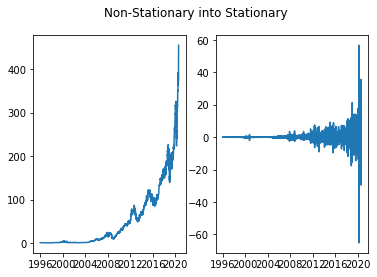

In [19]:
# Calculating and visualizing the difference
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Non-Stationary into Stationary')
# apple data as a non-stationary random walk
ax1.plot(apple['Close'])
# by computing the first differences, it becomes a stationary white noise process
ax2.plot(apple['Close'].diff().diff())
plt.show()

So we can use some techniques to estimate or model this trend and then remove it from the series. There can be many ways of doing it and some of most commonly used are:
- Aggregation – taking average for a time period like monthly/weekly averages
- Smoothing – taking rolling averages
- Polynomial Fitting – fit a regression model

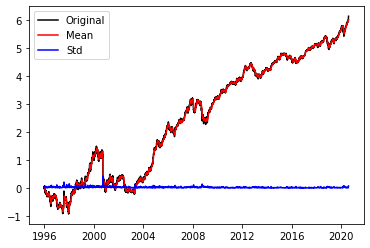

Results of Dicky-Fuller Test:
Test Statistic                    0.070866
p-value                           0.964015
#Lags Used                       22.000000
Number of Observations Used    6170.000000
Critical Value(1%                -3.431410
Critical Value(5%                -2.862009
Critical Value(10%               -2.567019
dtype: float64


In [20]:
# Taking the log
appleLogScale = np.log(apple['Close'])

# Smoothing the data
# Here we can take the average over the past 1 year, i.e. last 12 values.
moving_avg = appleLogScale.rolling(window = 12).mean()
movingSTD = appleLogScale.rolling(window=12).std()
orig = plt.plot(appleLogScale , color='black', label='Original')
mean = plt.plot(moving_avg, color='red', label='Mean')
std = plt.plot(movingSTD, color='blue', label='Std')
plt.legend(loc='best')
plt.title = ("Rolling mean and STD")
plt.show(block=False)


from statsmodels.tsa.stattools import adfuller
print("Results of Dicky-Fuller Test:")
dftest = adfuller(appleLogScale, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value(%s' %key] = value
    
print(dfoutput)

By taking only the log of the series we simply eliminate the exponatial growth. Applying the difference and the log at the same time, the transformed series looks stationary.

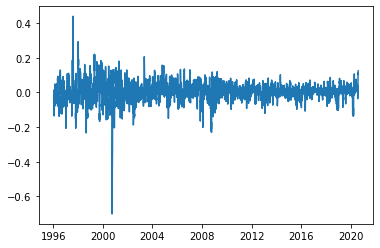

In [21]:
# taking the difference and plotting
appleLogScaleMinusMA = appleLogScale - moving_avg
appleLogScaleMinusMA.dropna(inplace=True)
plt.plot(appleLogScaleMinusMA)
plt.show()

In [22]:
# ADF test after taking the log anf difference 
test_stationarity(appleLogScaleMinusMA)

Results of Dickey-Fuller Test:
Test Statistic                -1.614457e+01
p-value                        4.637799e-29
#Lags Used                     1.700000e+01
Number of Observations Used    6.164000e+03
Critical Value (1%)           -3.431411e+00
Critical Value (5%)           -2.862009e+00
Critical Value (10%)          -2.567020e+00
dtype: float64


This looks like a much better series. However, a drawback in this particular approach is that the time-period has to be strictly defined. In this case we can take yearly averages but in complex situations like forecasting a stock price, its difficult to come up with a number. So we take a ‘weighted moving average’ where more recent values are given a higher weight. There can be many technique for assigning weights. A popular one is exponentially weighted moving average where weights are assigned to all the previous values with a decay factor.

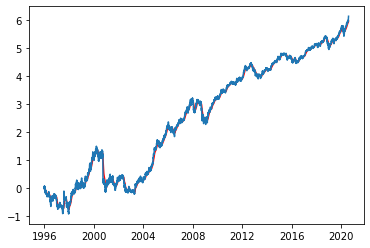

In [24]:
# calculating the weighted moving average
exponentialWeightedAVG = appleLogScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
appleLogScaleMinusMovingEWA = appleLogScale - exponentialWeightedAVG
plt.plot(exponentialWeightedAVG,  color='red')
plt.plot(appleLogScale)
plt.show()

In [25]:
# ADF test after calculating the weighted moving average
test_stationarity(appleLogScaleMinusMovingEWA)

Results of Dickey-Fuller Test:
Test Statistic                -9.936328e+00
p-value                        2.737526e-17
#Lags Used                     2.200000e+01
Number of Observations Used    6.170000e+03
Critical Value (1%)           -3.431410e+00
Critical Value (5%)           -2.862009e+00
Critical Value (10%)          -2.567019e+00
dtype: float64
